# Coursera Capstone Project 
# The Battle of Neighborhoods (Part 1 & Part 2)


## Content
1. [Introduction Section](#introduction) <br>
    1.1 [Problem Description and Background](#intro-1)<br>
    1.2 [Target Audience](#intro-2)
2. [Data Section](#data) <br>
    2.1 [New York City Dataset](#data-1) <br>
    2.2 [Data Preparation](#data-2) <br>
3. [Methodology](#methodology)<br>
    3.1 [Explore NYC Central Business Districts, using the Foursquare API ](#methodology-1)<br>
    3.2 [Clustering NYC Central Business Districts (Neighborhoods) using K-Means ](#methodology-2)<br>

### 1. Introduction <a id='introduction'></a>
### 1.1 Problem Description and Background <a id='intro-1'></a>
<font size=3> New York City is one of the World's 20 largest metropolitan areas and the financial capital of USA. It is a global hub of all kinds of businesses such as banking, retailing, world trade, transportation, tourism, real estate, legal services, accountancy, insurance, theater, fashion, and arts. It is definitely one of the best places to start a new business. 

Office areas provide great opportunities for restaurants during daytime. Shops are usually full especially at lunch time (11am - 2pm). Given this scenario I will analyze the prospect of opening a lunch restaurant, close to office areas in the city of New York. The analysis will provide insights about which neighborhoods are suitable to open a lunch restaurant. </font>

### 1.2 Target Audience <a id='intro-2'></a>
<font size=3> 
- Anyone who is interested in starting a restaurant business in New York City. This analysis can be used as a guide to start or expand restaurants targeting larger pool of office workers during lunch hours.
- Office workers, to find potential lunch places close to office.
- Students who wants to develop their data science skills. This project is a good practical case to implement some of the most used Exploratory Data Analysis techniques to obtain necessary data, analyze it, and, finally to tell a story out of it.
</font>

### 2. Data Section <a id='data'></a>
### 2.1 New York City Dataset <a id='data-1'></a>
<font size=3>According to the business problem described in the previous section, the data required for analysis is a dataset of New York City neighborhoods and boroughs. New York City has a total of 5 boroughs and 306 neighborhoods. In order to segment the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the latitude and longitude coordinates of each neighborhood. Luckily, this dataset is available on the web, here is the link to the dataset https://geo.nyu.edu/catalog/nyu_2451_34572. This dataset will be used to compare different neighborhoods within each borough in order to figure out the most suitable neighborhoods to open a lunch restaurant.</font>



### 2.2 Data Preparation <a id='data-2'></a>

In [1]:
#import the necessary libraries
import numpy as np

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
#download dataset
!python -m wget https://cocl.us/new_york_dataset
print('Data downloaded!')

100% [........................................................] 115774 / 115774Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.7/site-packages/wget.py", line 568, in <module>
    filename = download(args[0], out=options.output)
  File "/anaconda3/lib/python3.7/site-packages/wget.py", line 533, in download
    filename = filename_fix_existing(filename)
  File "/anaconda3/lib/python3.7/site-packages/wget.py", line 269, in filename_fix_existing
    name, ext = filename.rsplit('.', 1)
ValueError: not enough values to unpack (expected 2, got 1)
Data downloaded!


In [3]:
#load the data
with open('new_york_dataset') as json_data:
    newyork_data = json.load(json_data)

In [4]:
#let's take a look to the data 
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 


All the relevant data is in the features key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data


In [5]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [6]:
#Tranform the data into a pandas dataframe 
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [7]:
#loop through the data and fill the dataframe, one row at a time
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [8]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)
neighborhoods.sample(20)

The dataframe has 5 boroughs and 306 neighborhoods.


,Borough,Neighborhood,Latitude,Longitude
105,Manhattan,Central Harlem,40.815976,-73.943211
64,Brooklyn,Brooklyn Heights,40.695864,-73.993782
159,Queens,Briarwood,40.710935,-73.811748
101,Manhattan,Washington Heights,40.851903,-73.936900
242,Staten Island,Greenridge,40.555295,-74.170794
234,Staten Island,New Dorp Beach,40.564255,-74.104327
74,Brooklyn,Canarsie,40.635564,-73.902093
45,Bronx,Edenwald,40.884561,-73.848083
9,Bronx,Williamsbridge,40.881039,-73.857446
139,Queens,Long Island City,40.750217,-73.939202



For the analysis, let the focus be on New York City's Central Business Districts (CBD). According to [ny-offices.com](http://www.ny-offices.com/nycity/new-york-citys-cbds-central-business-districts/), New York City CBDs:

1. Midtown Manhattan
2. Lower Manhattan, financial district of NYC
3. Downtown Brooklyn
4. Downtown Flushing
5. Long Island City




In [9]:
cbd = ['Midtown', 'Financial District', 'Downtown', 'Flushing', 'Long Island City']
neighborhoods_selected = neighborhoods.loc[neighborhoods['Neighborhood'].isin(cbd)].reset_index()
neighborhoods_selected = neighborhoods_selected.drop('index', 1)
neighborhoods_selected

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Downtown,40.690844,-73.983463
1,Manhattan,Midtown,40.754691,-73.981669
2,Manhattan,Financial District,40.707107,-74.010665
3,Queens,Flushing,40.764454,-73.831773
4,Queens,Long Island City,40.750217,-73.939202


### 3. Methodology <a id='methodology'></a>

Let's first visualize NYC Central Business Districts

In [10]:
# Use geopy library to get the latitude and longitude values of New York City.
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [11]:
# create map of New York City with neighborhoods using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods_selected['Latitude'], neighborhoods_selected['Longitude'], neighborhoods_selected['Borough'], neighborhoods_selected['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='Magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### 3.1  Explore NYC Central Business Districts, using  the Foursquare API <a id='methodology-1'></a>

In order to decide which neighborhood is best for opening a restaurant, I will explore the areas around the 5 districts. Using the Foursquare API to get the top 100 venues within a radius of 1 km for each district.

In [35]:
# Define foursquare credentials and version
CLIENT_ID = 'XXX' # your Foursquare ID
CLIENT_SECRET = 'XXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXX
CLIENT_SECRET:XXX


In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
#use the above function to create a new dataframe of venues around the selected 5 neighborhoods
nyc_cbd_venues = getNearbyVenues(names=neighborhoods_selected['Neighborhood'],
                                   latitudes=neighborhoods_selected['Latitude'],
                                   longitudes=neighborhoods_selected['Longitude']
                                  )

Downtown
Midtown
Financial District
Flushing
Long Island City


In [15]:
print('Shape of venues dataframe: ',nyc_cbd_venues.shape)
nyc_cbd_venues.sample(10)

Shape of venues dataframe:  (500, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
408,Long Island City,40.750217,-73.939202,The Beast Next Door Cafe & Bar,40.748926,-73.941660,Bar
343,Flushing,40.764454,-73.831773,Morning Glory,40.760416,-73.827484,Gift Shop
55,Downtown,40.690844,-73.983463,Free Range Wines & Spirits,40.688037,-73.987610,Wine Shop
214,Financial District,40.707107,-74.010665,Crown Shy,40.706187,-74.007490,Restaurant
71,Downtown,40.690844,-73.983463,BAM Howard Gilman Opera House,40.686537,-73.977857,Opera House
95,Downtown,40.690844,-73.983463,Hanco's Bubble Tea & Vietnamese Sandwich,40.687158,-73.990204,Vietnamese Restaurant
480,Long Island City,40.750217,-73.939202,The Inkan,40.746841,-73.945625,Restaurant
46,Downtown,40.690844,-73.983463,The Brooklyner Roof,40.692843,-73.985979,Roof Deck
88,Downtown,40.690844,-73.983463,Fort Greene Park Tennis Courts,40.690718,-73.975239,Tennis Court
123,Midtown,40.754691,-73.981669,Koi New York,40.752755,-73.983304,Sushi Restaurant


In [16]:
#number of unique categories in venues dataframe
print('There are {} uniques categories.'.format(len(nyc_cbd_venues['Venue Category'].unique())))

There are 162 uniques categories.


As we can see  there are **162 unique categories** from all the returned venues, but the focus of this analysis is on **Restaurant** category

In [17]:
#create a new dataframe of venue category restaurant only
nyc_cbd_venues_restaurants = nyc_cbd_venues[nyc_cbd_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
print ("Shape of the dataframe with venue category only 'Restaurant': ", nyc_cbd_venues_restaurants.shape)
nyc_cbd_venues_restaurants

Shape of the dataframe with venue category only 'Restaurant':  (134, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown,40.690844,-73.983463,Han Dynasty,40.691334,-73.982456,Chinese Restaurant
1,Downtown,40.690844,-73.983463,Daigo Hand Roll Bar,40.691259,-73.982603,Japanese Restaurant
2,Downtown,40.690844,-73.983463,Charm Kao,40.689445,-73.986585,Thai Restaurant
3,Downtown,40.690844,-73.983463,Xifu Food,40.688027,-73.982088,Chinese Restaurant
4,Downtown,40.690844,-73.983463,Grand Army,40.688329,-73.986612,Seafood Restaurant
5,Downtown,40.690844,-73.983463,Chicks Isan,40.690758,-73.983387,Thai Restaurant
6,Downtown,40.690844,-73.983463,Likkle More Jerk,40.690743,-73.983388,Caribbean Restaurant
7,Downtown,40.690844,-73.983463,Bedouin Tent,40.686936,-73.984469,Middle Eastern Restaurant
8,Downtown,40.690844,-73.983463,Sophies Cuban Cuisine,40.690602,-73.987700,Cuban Restaurant
9,Downtown,40.690844,-73.983463,Kotti Berliner Döner Kebab,40.690662,-73.983533,Restaurant


In [18]:
#create a map of the most frequently visited restaurants in the 5 districts.
map_restaurants = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color scheme for the Venues based on the Major Districts
cbd = ['Downtown','Midtown', 'Financial District', 'Flushing', 'Long Island City']
x = np.arange(len(cbd))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']


for lat, lon, cat, dist in zip(nyc_cbd_venues_restaurants['Venue Latitude'], 
                                  nyc_cbd_venues_restaurants['Venue Longitude'], 
                                  nyc_cbd_venues_restaurants['Venue Category'], 
                                  nyc_cbd_venues_restaurants['Neighborhood']):
    label = folium.Popup(str(cat) + ' ' + str(dist), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cbd.index(dist)-1],
        fill=True,
        fill_color=rainbow[cbd.index(dist)-1],
        fill_opacity=0.3).add_to(map_restaurants)
       
map_restaurants

In [19]:
#create a dataframe of the 10 most frequently occuring Venue Category
nyc_cbd_venues_top10 = nyc_cbd_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
nyc_cbd_venues_top10 = nyc_cbd_venues_top10.reset_index()
nyc_cbd_venues_top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
nyc_cbd_venues_top10


,Venue Category,Frequency
0,Coffee Shop,30
1,Chinese Restaurant,23
2,Hotel,16
3,Bubble Tea Shop,14
4,Bakery,12
5,Pizza Place,12
6,Gym,11
7,Theater,10
8,Sandwich Place,10
9,Gym / Fitness Center,9


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=nyc_cbd_venues_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title("10 Most Frequently Occuring Venues in New York City's CBDs", fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
#plt.savefig("most_occuring_rest.png", dpi=240)
plt.show()

<Figure size 1800x700 with 1 Axes>

The bar chart illustrated above shows that **Coffee Shop** is the most common venue among all the five districts, followed by **Chinese Restaurant**

In [21]:
#analyzing each neighborhood with one-hot encoding 
#one hot encoding
nyc_cbd_onehot = pd.get_dummies(nyc_cbd_venues[['Venue Category']], prefix="", prefix_sep="")

#add neighborhood column back to dataframe
nyc_cbd_onehot['Neighborhood'] = nyc_cbd_venues['Neighborhood'] 

#move neighborhood column to the first column
fixed_columns = [nyc_cbd_onehot.columns[-1]] + list(nyc_cbd_onehot.columns[:-1])
nyc_cbd_onehot = nyc_cbd_onehot[fixed_columns]

nyc_cbd_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Big Box Store,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gastropub,General Entertainment,Gift Shop,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lingerie Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Office,Opera House,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool Hall,Post Office,Pub,Residential Building (Apartment / Condo),Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,TV Station,Taco Place,Tailor Shop,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [22]:
#let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
nyc_cbd_venues_grouped = nyc_cbd_onehot.groupby('Neighborhood').mean().reset_index()
nyc_cbd_venues_grouped

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Big Box Store,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gastropub,General Entertainment,Gift Shop,Gourmet Shop,Government Building,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lingerie Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Office,Opera House,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool Hall,Post Office,Pub,Residential Building (Apartment / Condo),Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Soccer Field,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,TV Station,Taco Place,Tailor Shop,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Downtown,0.01,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.04,0.00,0.03,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.02,0.01,0.01,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.02,0.07,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.02,0.01,0.03,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.02,0.00,0.01,0.00,0.01,0.00,0.02,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.02,0.01,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.03,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.02,0.00,0.00,0.01,0.00,0.01,0.01,0.02,0.00,0.01
1,Financial District,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.08,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.03,0.00,0.03,0.01,0.01,0.00,0.01,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.03,0.00,0.01,0.00,0.00,0.02,0.01,0.00,0.01,0.01,0.00,0.00,0.01,0.01,0.02,0.02,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.04,0.00,0.02,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.00,0.03,0.00,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.01,0.01
2,Flushing,0.00,0.00,

Now we have, for each neighborhood, the distribution of types of venues that exist on a scale from 0 to 1. This will be used later for clustering.

Next, we will create a dataframe with the top 10 most common venues for each of the five neighborhoods.

In [23]:
#print each neighborhood along with the ten most common venue type
num_top_venues = 15

for hood in nyc_cbd_venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = nyc_cbd_venues_grouped[nyc_cbd_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Downtown----
                    venue  freq
0             Coffee Shop  0.07
1                  Bakery  0.04
2                     Bar  0.03
3          Sandwich Place  0.03
4    Gym / Fitness Center  0.03
5      Chinese Restaurant  0.02
6   Performing Arts Venue  0.02
7             Pizza Place  0.02
8            Burger Joint  0.02
9     Japanese Restaurant  0.02
10         Ice Cream Shop  0.02
11           Cocktail Bar  0.02
12            Opera House  0.02
13    Arts & Crafts Store  0.02
14        Thai Restaurant  0.02


----Financial District----
                   venue  freq
0            Coffee Shop  0.08
1    American Restaurant  0.04
2              Wine Shop  0.04
3            Pizza Place  0.04
4         Sandwich Place  0.03
5     Falafel Restaurant  0.03
6   Gym / Fitness Center  0.03
7           Cocktail Bar  0.03
8                   Café  0.03
9            Event Space  0.03
10         Memorial Site  0.02
11                   Gym  0.02
12           Salad Place  0.02
13      

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nyc_cbd_top10_venues_sorted = pd.DataFrame(columns=columns)
nyc_cbd_top10_venues_sorted['Neighborhood'] = nyc_cbd_venues_grouped['Neighborhood']

for ind in np.arange(nyc_cbd_venues_grouped.shape[0]):
    nyc_cbd_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_cbd_venues_grouped.iloc[ind, :], num_top_venues)

nyc_cbd_top10_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown,Coffee Shop,Bakery,Sandwich Place,Gym / Fitness Center,Bar,Burger Joint,Grocery Store,Ice Cream Shop,Pizza Place,Japanese Restaurant
1,Financial District,Coffee Shop,American Restaurant,Wine Shop,Pizza Place,Café,Sandwich Place,Falafel Restaurant,Event Space,Cocktail Bar,Gym / Fitness Center
2,Flushing,Chinese Restaurant,Bubble Tea Shop,Hotpot Restaurant,Korean Restaurant,Dumpling Restaurant,Bakery,Asian Restaurant,Cantonese Restaurant,Food Court,Gym
3,Long Island City,Coffee Shop,Hotel,Mexican Restaurant,Indian Restaurant,Café,Italian Restaurant,Pizza Place,Climbing Gym,Brewery,Restaurant
4,Midtown,Theater,Coffee Shop,Gym,Hotel,Sandwich Place,Cuban Restaurant,Plaza,Clothing Store,Salad Place,Sporting Goods Shop


[20, 19, 52, 21, 22]


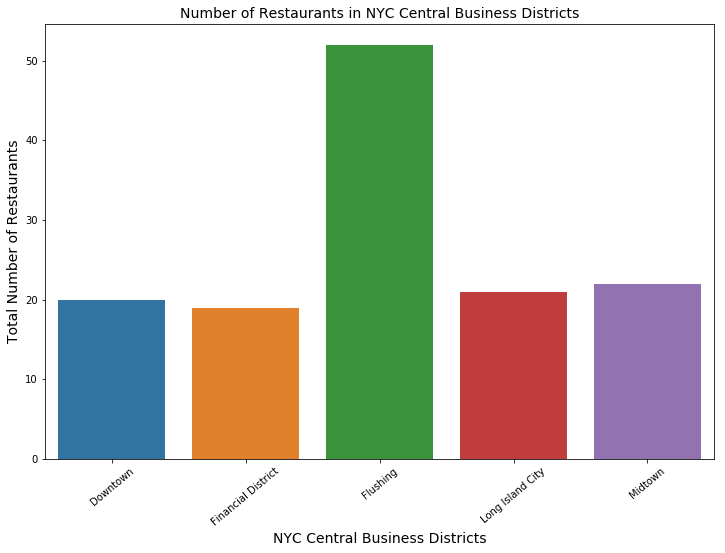

In [26]:
nyc_cbd_venues_restaurant = nyc_cbd_venues.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
nyc_cbd_venues_restaurant_df = nyc_cbd_venues_restaurant.to_frame().reset_index()
nyc_cbd_venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']

nyc_cbd_venues_restaurant_df.index = np.arange(1, len(nyc_cbd_venues_restaurant_df)+1)

list_rest_no = nyc_cbd_venues_restaurant_df['Number of Restaurant'].to_list()
print (list_rest_no)

fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='Neighborhood', y='Number of Restaurant', data=nyc_cbd_venues_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("NYC Central Business Districts", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants in NYC Central Business Districts", fontsize=14)
plt.savefig("res_no_per_dist.png", dpi=240)
plt.show()

### 3.2 Clustering NYC Central Business Districts (Neighborhoods) using K-Means <a id='methodology-2'></a>


In the previous section, we have created a dataframe with features characterizing each neighborhood, based solely on the existing venues. In this section, we use **K-Means** to cluster together neighborhoods that have similar characteristics. 

In [27]:
#set number of clusters
kclusters = 3

nyc_grouped_clustering = nyc_cbd_venues_grouped.drop('Neighborhood', 1)

#run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_clustering)

#check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_[0:5])

Check the 5 Cluster labels : [0 0 1 2 0]


In [28]:
# add clustering labels

nyc_cbd_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

nyc_cbd_coordinate_cluster_merged = neighborhoods_selected

#merge the inital NYC dataframe with sorted most visited places for each neighborhood
nyc_cbd_coordinate_cluster_merged = nyc_cbd_coordinate_cluster_merged.join(nyc_cbd_top10_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

nyc_cbd_coordinate_cluster_merged.head()



,Borough,Neighborhood,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Downtown,40.690844,-73.983463,0,Coffee Shop,Bakery,Sandwich Place,Gym / Fitness Center,Bar,Burger Joint,Grocery Store,Ice Cream Shop,Pizza Place,Japanese Restaurant
1,Manhattan,Midtown,40.754691,-73.981669,0,Theater,Coffee Shop,Gym,Hotel,Sandwich Place,Cuban Restaurant,Plaza,Clothing Store,Salad Place,Sporting Goods Shop
2,Manhattan,Financial District,40.707107,-74.010665,0,Coffee Shop,American Restaurant,Wine Shop,Pizza Place,Café,Sandwich Place,Falafel Restaurant,Event Space,Cocktail Bar,Gym / Fitness Center
3,Queens,Flushing,40.764454,-73.831773,1,Chinese Restaurant,Bubble Tea Shop,Hotpot Restaurant,Korean Restaurant,Dumpling Restaurant,Bakery,Asian Restaurant,Cantonese Restaurant,Food Court,Gym
4,Queens,Long Island City,40.750217,-73.939202,2,Coffee Shop,Hotel,Mexican Restaurant,Indian Restaurant,Café,Italian Restaurant,Pizza Place,Climbing Gym,Brewery,Restaurant


In [29]:
#create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

#set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_cbd_coordinate_cluster_merged['Latitude'], 
                                  nyc_cbd_coordinate_cluster_merged['Longitude'], 
                                  nyc_cbd_coordinate_cluster_merged['Neighborhood'], 
                                  nyc_cbd_coordinate_cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 3.2.1 Final Map of 3 clusters with radius of the clusters representing the number of restaurants in each neighborhood

In [34]:
#create map
map_restaurants10 = folium.Map(location=[latitude, longitude], zoom_start=11)

#set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
cbd = ['Downtown', 'Financial District','Flushing', 'Long Island City', 'Midtown']

# add markers to the map
for lat, lon, poi, cluster in zip(nyc_cbd_coordinate_cluster_merged['Latitude'], 
                                  nyc_cbd_coordinate_cluster_merged['Longitude'], 
                                  nyc_cbd_coordinate_cluster_merged['Neighborhood'], 
                                  nyc_cbd_coordinate_cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[cbd.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

### 3.2.2 Explore clusters

### Cluster 0

In [31]:
Cluster0 = nyc_cbd_coordinate_cluster_merged.loc[nyc_cbd_coordinate_cluster_merged['Cluster Label'] == 0, 
                                    nyc_cbd_coordinate_cluster_merged.columns[[1] + list(range(5, nyc_cbd_coordinate_cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 0 is %d" %(Cluster0.shape[0]))
Cluster0


No of Neighbourhood in Cluster Label 0 is 3


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown,Coffee Shop,Bakery,Sandwich Place,Gym / Fitness Center,Bar,Burger Joint,Grocery Store,Ice Cream Shop,Pizza Place,Japanese Restaurant
1,Midtown,Theater,Coffee Shop,Gym,Hotel,Sandwich Place,Cuban Restaurant,Plaza,Clothing Store,Salad Place,Sporting Goods Shop
2,Financial District,Coffee Shop,American Restaurant,Wine Shop,Pizza Place,Café,Sandwich Place,Falafel Restaurant,Event Space,Cocktail Bar,Gym / Fitness Center


### Cluster 1

In [32]:
Cluster1 = nyc_cbd_coordinate_cluster_merged.loc[nyc_cbd_coordinate_cluster_merged['Cluster Label'] == 1, 
                                    nyc_cbd_coordinate_cluster_merged.columns[[1] + list(range(5, nyc_cbd_coordinate_cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1 is %d" %(Cluster1.shape[0]))
Cluster1

No of Neighbourhood in Cluster Label 1 is 1


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Flushing,Chinese Restaurant,Bubble Tea Shop,Hotpot Restaurant,Korean Restaurant,Dumpling Restaurant,Bakery,Asian Restaurant,Cantonese Restaurant,Food Court,Gym


### Cluster 2

In [33]:
Cluster2 = nyc_cbd_coordinate_cluster_merged.loc[nyc_cbd_coordinate_cluster_merged['Cluster Label'] == 2, 
                                    nyc_cbd_coordinate_cluster_merged.columns[[1] + list(range(5, nyc_cbd_coordinate_cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 2 is %d" %(Cluster2.shape[0]))
Cluster2

No of Neighbourhood in Cluster Label 2 is 1


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Long Island City,Coffee Shop,Hotel,Mexican Restaurant,Indian Restaurant,Café,Italian Restaurant,Pizza Place,Climbing Gym,Brewery,Restaurant
